---
# Import Module
---


In [1]:
# import required packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pandas as pd
import numpy as np
import nltk
import re
from nltk import corpus
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.model_selection import train_test_split
from nltk import wsd
from nltk.corpus import wordnet as wn
nltk.download('stopwords')
nltk.download('wordnet')

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import  EarlyStopping

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


---
# Data Understanding
Dataset ini berisi informasi blog sebanyak 10467, informasi author blog sebanyak 6868 dan informasi yang memberikan rating blog sebanyak 200140.

untuk file csv terdiri dari 3 file, yaitu:

1. Medium Blog Data
2. Author Data
3. Blog ratings
---

In [2]:
blog_df = pd.read_csv('/content/Medium Blog Data.csv')
author_df = pd.read_csv('/content/Author Data.csv')
ratings_df = pd.read_csv('/content/Blog Ratings.csv')

---
# Univariate Exploratory Data Analysis
variabel - variabel pada dataset ini adalah:

**blog_df**

- blog_id : id unik nama blog
- author_id : id unik penulis blog
- blog_title : judul blog
- blog_content : ringkasan isi blog
- blog_link : link blog
- blog_img : gambar blog
- blog_topic : topik blog yang ditulis.

**author_df**

- author_id : id unik penulis blog
- author_name : nama penulis blog

**ratings_df**

- blog_id : id unik nama blog
- user_id : id pengguna
- ratings : rating yang diberikan oleh pengguna

---

In [3]:
blog_df

,blog_id,author_id,blog_title,blog_content,blog_link,blog_img,topic,scrape_time
0,1,4,Let’s Dominate The Launchpad Space Again,"Hello, fam! If you’ve been with us since 2021,...",https://medium.com/@seedifyfund/lets-dominate-...,https://miro.medium.com/fit/c/140/140/1*nByLJr...,ai,2023-02-27 07:37:48
1,3,4,Let’s Dominate The Launchpad Space Again,"Hello, fam! If you’ve been with us since 2021,...",https://medium.com/@seedifyfund/lets-dominate-...,https://miro.medium.com/fit/c/140/140/1*nByLJr...,ai,2023-02-27 07:41:47
2,4,7,Using ChatGPT for User Research,Applying AI to 4 common user research activiti...,https://medium.com/ux-planet/using-chatgpt-for...,https://miro.medium.com/fit/c/140/140/1*TZSGnN...,ai,2023-02-27 07:41:47
3,5,8,The Automated Stable-Diffusion Checkpoint Merg...,Checkpoint merging is powerful. The power of c...,https://medium.com/@media_97267/the-automated-...,https://miro.medium.com/fit/c/140/140/1*x3N_Hj...,ai,2023-02-27 07:41:47
4,6,9,The Art of Lazy Creativity: My Experience Co-W...,I was feeling particularly lazy one day and co...,https://medium.com/@digitalshedmedia/the-art-o...,https://miro.medium.com/fit/c/140/140/0*m2DdeT...,ai,2023-02-27 07:41:47
...,...,...,...,...,...,...,...,...
10462,10489,6867,Introducing Qwik — A Superfast JavaScript Fram...,An overview of Qwik’s key features and archite...,https://medium.com/gitconnected/introducing-qw...,https://miro.medium.com/v2/resize:fill:140:140...,web-development,2023-05-08 10:36:42
10463,10490,2490,A Beginner’s Guide to Cypress Testing Framewor...,Cypress is a popular JavaScript testing framew...,https://medium.com/itnext/a-beginners-guide-to...,https://miro.medium.com/v2/resize:fill:140:140...,web-development,2023-05-08 10:36:42
10464,10491,6810,How To Use Awaited in TypeScript,Unraveling the magic of Promise handling with ...,https://medium.com/totally-typescript/how-to-u...,https://miro.medium.com/v2/resize:fill:140:140...,web-development,2023-05-08 10:36:42
10465,10492,6868,Angular Hydration? WTF is it and why does it m...,How thirsty is your app for better performance...,https://medium.com/@PurpleGreenLemon/angular-h...,https://miro.medium.com/v2/resize:fill:140:140...,web-development,2023-05-08 10:36:42


In [4]:
author_df

,author_id,author_name
0,1,yaksh
1,2,XIT
2,3,Daniel Meyer
3,4,Seedify Fund
4,5,Ifedolapo Shiloh Olotu
...,...,...
6863,6864,Fresh Frontend Links
6864,6865,Mukesh buwade
6865,6866,Osei Owusu
6866,6867,Yasas Sandeepa


In [5]:
ratings_df

,blog_id,userId,ratings
0,9025,11,3.5
1,9320,11,5.0
2,9246,11,3.5
3,9431,11,5.0
4,875,11,2.0
...,...,...,...
200135,6714,22,5.0
200136,6576,22,3.5
200137,6222,22,3.5
200138,6015,22,2.0


---
## Blog Variabel

Deskripsi blog variabel

---

In [6]:
blog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10467 entries, 0 to 10466
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   blog_id       10467 non-null  int64 
 1   author_id     10467 non-null  int64 
 2   blog_title    10467 non-null  object
 3   blog_content  10467 non-null  object
 4   blog_link     10467 non-null  object
 5   blog_img      10467 non-null  object
 6   topic         10467 non-null  object
 7   scrape_time   10467 non-null  object
dtypes: int64(2), object(6)
memory usage: 654.3+ KB


In [7]:
print("="*10,'[Topik Blog yang di Posting]',"="*10)
blog_df['topic'].value_counts()

========== [Topik Blog yang di Posting] ==========


ai                      736
blockchain              644
cybersecurity           642
web-development         635
data-analysis           594
cloud-computing         589
security                527
web3                    471
machine-learning        467
nlp                     453
data-science            444
deep-learning           430
android                 426
dev-ops                 384
information-security    374
image-processing        354
flutter                 343
backend                 341
cloud-services          339
Cryptocurrency          331
app-development         322
backend-development     312
Software-Development    309
Name: topic, dtype: int64

---
## Author Variabel

Deskripsi author variabel

---

In [8]:
author_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6868 entries, 0 to 6867
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   author_id    6868 non-null   int64 
 1   author_name  6868 non-null   object
dtypes: int64(1), object(1)
memory usage: 107.4+ KB


In [9]:
print('Banyak Penulis Artikel: ', len(author_df.author_id.unique()))

Banyak Penulis Artikel:  6868


---
## Rating Variabel

Deskripsi rating variabel

---

In [10]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200140 entries, 0 to 200139
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   blog_id  200140 non-null  int64  
 1   userId   200140 non-null  int64  
 2   ratings  200140 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 4.6 MB


In [11]:
ratings_df.describe()

,blog_id,userId,ratings
count,200140.000000,200140.000000,200140.000000
mean,5652.533621,2545.710158,3.117468
std,2970.685946,1446.195478,1.768113
min,1.000000,10.000000,0.500000
25%,2906.000000,1314.000000,2.000000
50%,5994.000000,2552.000000,3.500000
75%,8510.000000,3795.000000,5.000000
max,9755.000000,5010.000000,5.000000


Rata-rata rating blog yang diberikan user berkisar antara 0.5 sampai 5

In [12]:
print('Jumlah userID: ', len(ratings_df.userId.unique()))
print('Jumlah blogID: ', len(ratings_df.blog_id.unique()))
print('Jumlah data rating: ', len(ratings_df))

Jumlah userID:  5001
Jumlah blogID:  9706
Jumlah data rating:  200140


In [13]:
def showTopicList(df):
    # Split the topic in each row and create a list of individual topic
    topic_lists = df['topic'].str.split(', ')

    # Flatten the list of lists
    flattened_topics = [topic for topics in topic_lists for topic in topics]

    # Get the unique topic
    unique_topics = pd.Series(flattened_topics).unique()

    # Display the unique topic
    print(unique_topics)

    print("\nTotal\n")
    print(df['topic'].str.split(', ').explode().value_counts().to_markdown())

In [14]:
# List topic pada dataset blog
showTopicList(blog_df)

['ai' 'image-processing' 'Cryptocurrency' 'data-science' 'dev-ops'
 'security' 'android' 'cloud-computing' 'nlp' 'cloud-services' 'flutter'
 'web3' 'cybersecurity' 'information-security' 'blockchain'
 'machine-learning' 'deep-learning' 'data-analysis' 'backend'
 'backend-development' 'app-development' 'web-development'
 'Software-Development']

Total

|                      |   topic |
|:---------------------|--------:|
| ai                   |     736 |
| blockchain           |     644 |
| cybersecurity        |     642 |
| web-development      |     635 |
| data-analysis        |     594 |
| cloud-computing      |     589 |
| security             |     527 |
| web3                 |     471 |
| machine-learning     |     467 |
| nlp                  |     453 |
| data-science         |     444 |
| deep-learning        |     430 |
| android              |     426 |
| dev-ops              |     384 |
| information-security |     374 |
| image-processing     |     354 |
| flutter       

In [15]:
def showTopicPlot(df):
  # Count the occurrences of each topic
  topic_counts = df['topic'].str.split(', ').explode().value_counts()

  # Create the bar plot
  plt.figure(figsize=(15, 6))
  plt.bar(topic_counts.index, topic_counts.values, width=0.6)

  # Set the labels and title
  plt.xlabel('Topic')
  plt.ylabel('Count')
  plt.title('Topic Distribution')

  # Rotate the x-axis labels for better readability
  plt.xticks(rotation=90)

  # Display the plot
  plt.show()

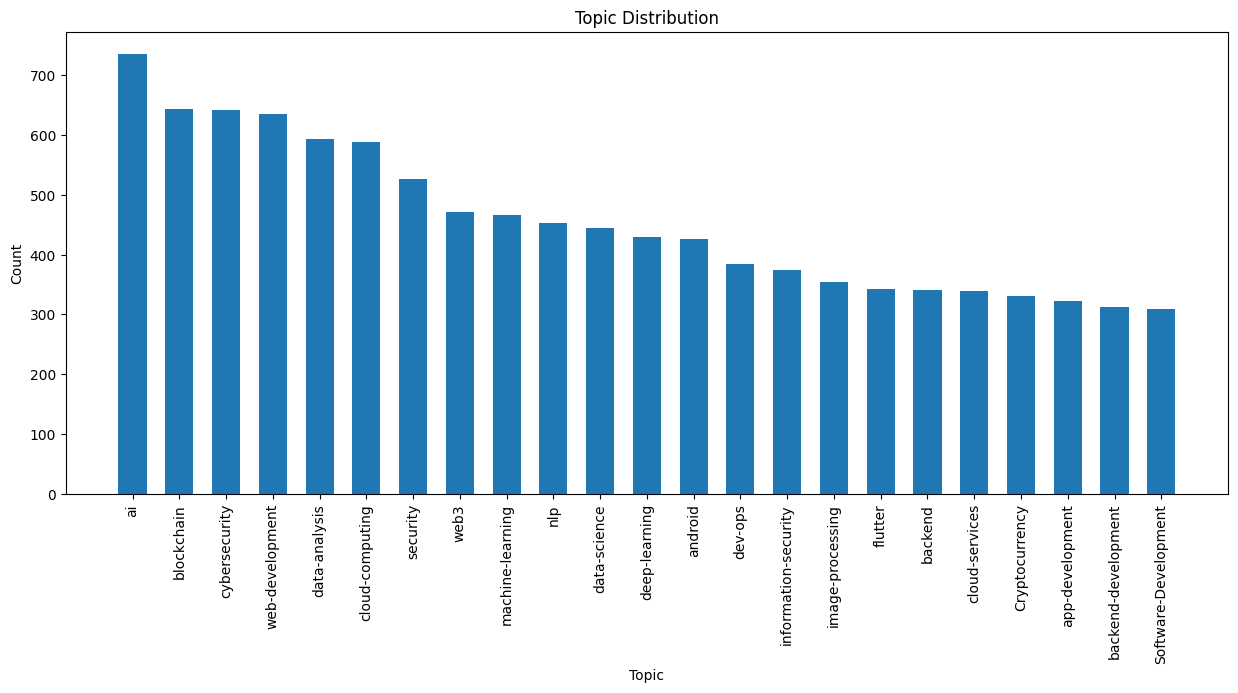

In [16]:
# Visualisasi untuk kolom topic pada dataset blog
showTopicPlot(blog_df)

Pada visualisasi diatas, topik blog yang banyak ditulis adalah ai (artificial inteligence)

<Axes: xlabel='ratings', ylabel='count'>

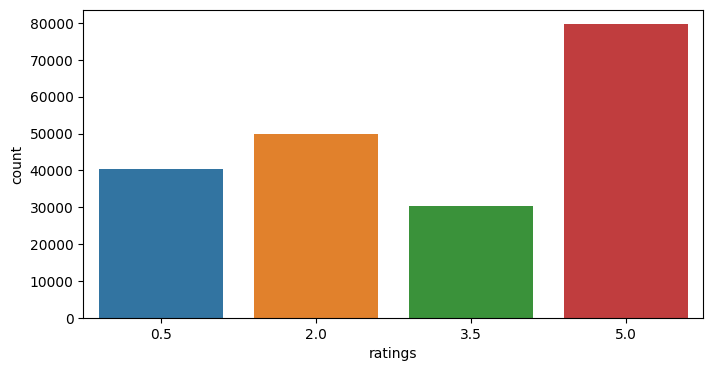

In [17]:
# Visualisasi untuk kolom rating pada dataset ratings
plt.figure(figsize=(8,4))
sns.countplot(x=ratings_df["ratings"])

Rating terbanyak yang diberikan adalah 5

---
# Data Preprocessing

Menghapus kolom yang tidak diperlukan

---

In [18]:
blog_df.drop(['author_id','blog_link','blog_img','scrape_time'],axis='columns',inplace=True)

In [19]:
blog_df

,blog_id,blog_title,blog_content,topic
0,1,Let’s Dominate The Launchpad Space Again,"Hello, fam! If you’ve been with us since 2021,...",ai
1,3,Let’s Dominate The Launchpad Space Again,"Hello, fam! If you’ve been with us since 2021,...",ai
2,4,Using ChatGPT for User Research,Applying AI to 4 common user research activiti...,ai
3,5,The Automated Stable-Diffusion Checkpoint Merg...,Checkpoint merging is powerful. The power of c...,ai
4,6,The Art of Lazy Creativity: My Experience Co-W...,I was feeling particularly lazy one day and co...,ai
...,...,...,...,...
10462,10489,Introducing Qwik — A Superfast JavaScript Fram...,An overview of Qwik’s key features and archite...,web-development
10463,10490,A Beginner’s Guide to Cypress Testing Framewor...,Cypress is a popular JavaScript testing framew...,web-development
10464,10491,How To Use Awaited in TypeScript,Unraveling the magic of Promise handling with ...,web-development
10465,10492,Angular Hydration? WTF is it and why does it m...,How thirsty is your app for better performance...,web-development


In [20]:
# Menghapus blog yang duplikat
blog_df.drop_duplicates(['blog_title','blog_content'],inplace=True)

In [21]:
blog_df

,blog_id,blog_title,blog_content,topic
0,1,Let’s Dominate The Launchpad Space Again,"Hello, fam! If you’ve been with us since 2021,...",ai
2,4,Using ChatGPT for User Research,Applying AI to 4 common user research activiti...,ai
3,5,The Automated Stable-Diffusion Checkpoint Merg...,Checkpoint merging is powerful. The power of c...,ai
4,6,The Art of Lazy Creativity: My Experience Co-W...,I was feeling particularly lazy one day and co...,ai
5,7,LLaMA: Everything you want to know about Meta’...,Facebook’s Parent Company Just Released a Game...,ai
...,...,...,...,...
10462,10489,Introducing Qwik — A Superfast JavaScript Fram...,An overview of Qwik’s key features and archite...,web-development
10463,10490,A Beginner’s Guide to Cypress Testing Framewor...,Cypress is a popular JavaScript testing framew...,web-development
10464,10491,How To Use Awaited in TypeScript,Unraveling the magic of Promise handling with ...,web-development
10465,10492,Angular Hydration? WTF is it and why does it m...,How thirsty is your app for better performance...,web-development


---
# Preprocessing Text Data

Melakukan praproses pada text data untuk menghapus stopwords dari konten blog dan juga menerapkan lemmatization untuk mengembalikan semua kata ke bentuk kata dasar.

---

In [22]:
lst_stopwords=corpus.stopwords.words('english')
def pre_process_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    text=str(text).lower()
    text=text.strip()
    text = re.sub(r'[^\w\s]', '', text)
    lst_text = text.split()
    if lst_stopwords is not None:
        lst_text=[word for word in lst_text if word not in lst_stopwords]
    if flg_lemm:
        lemmatizer = WordNetLemmatizer()
        lst_text = [lemmatizer.lemmatize(word) for word in lst_text]
    if flg_stemm:
        stemmer = PorterStemmer()
        lst_text = [stemmer.stem(word) for word in lst_text]
    text=" ".join(lst_text)
    return text

In [23]:
blog_df['clean_blog_content'] = blog_df['blog_content'].apply(lambda x: pre_process_text(x,flg_stemm=False,flg_lemm=True,lst_stopwords=lst_stopwords))

In [24]:
blog_df

,blog_id,blog_title,blog_content,topic,clean_blog_content
0,1,Let’s Dominate The Launchpad Space Again,"Hello, fam! If you’ve been with us since 2021,...",ai,hello fam youve u since 2021 probably remember...
2,4,Using ChatGPT for User Research,Applying AI to 4 common user research activiti...,ai,applying ai 4 common user research activity us...
3,5,The Automated Stable-Diffusion Checkpoint Merg...,Checkpoint merging is powerful. The power of c...,ai,checkpoint merging powerful power checkpoint m...
4,6,The Art of Lazy Creativity: My Experience Co-W...,I was feeling particularly lazy one day and co...,ai,feeling particularly lazy one day couldnt both...
5,7,LLaMA: Everything you want to know about Meta’...,Facebook’s Parent Company Just Released a Game...,ai,facebooks parent company released gamechanging...
...,...,...,...,...,...
10462,10489,Introducing Qwik — A Superfast JavaScript Fram...,An overview of Qwik’s key features and archite...,web-development,overview qwiks key feature architecture may aw...
10463,10490,A Beginner’s Guide to Cypress Testing Framewor...,Cypress is a popular JavaScript testing framew...,web-development,cypress popular javascript testing framework e...
10464,10491,How To Use Awaited in TypeScript,Unraveling the magic of Promise handling with ...,web-development,unraveling magic promise handling typescript a...
10465,10492,Angular Hydration? WTF is it and why does it m...,How thirsty is your app for better performance...,web-development,thirsty app better performance angular hydrati...


---

# Menggunakan TFIDF Vectorizer to vectorize pada blog topic

TF-IDF, kependekan dari Term Frequency-Inverse Document Frequency, adalah teknik yang banyak digunakan dalam pemrosesan bahasa alami dan pengambilan informasi untuk mengukur pentingnya suatu istilah dalam dokumen dalam kumpulan dokumen. TF-IDF menggabungkan dua faktor: Term Frequency (TF) dan Inverse Document Frequency (IDF).

- **Term Frequency (TF)**: TF mengukur frekuensi istilah dalam dokumen. Ini menghitung berapa kali suatu istilah muncul dalam dokumen dan mewakilinya sebagai hitungan mentah atau nilai yang dinormalisasi. Alasan di balik TF adalah bahwa istilah yang lebih sering muncul dalam dokumen cenderung lebih penting atau relevan dengan dokumen tersebut.

- **Inverse Document Frequency (IDF)**: IDF mengukur signifikansi suatu istilah di seluruh kumpulan dokumen. Ini menghitung logaritma fraksi terbalik dari jumlah dokumen yang mengandung istilah tersebut. Ide di balik IDF adalah bahwa istilah yang muncul di sejumlah kecil dokumen lebih informatif dan berharga daripada istilah yang muncul di sejumlah besar dokumen..

Perhitungan TF-IDF dilakukan dengan mengalikan nilai TF dan IDF secara bersamaan. Skor yang dihasilkan merepresentasikan pentingnya suatu istilah dalam dokumen dalam konteks keseluruhan kumpulan dokumen. Skor yang lebih tinggi menunjukkan bahwa suatu istilah lebih relevan atau berbeda dengan dokumen tertentu.

Rumus perhitungan TF-IDF untuk term (t) dalam dokumen (d) dalam kumpulan dokumen adalah sebagai berikut:
[Gambar](https://ptime.s3.ap-northeast-1.amazonaws.com/media/natural_language_processing/text_feature_Engineering/tf-idf-formula.PNG)


In [25]:
tfidf_vecotorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vecotorizer.fit_transform(blog_df['topic'])
print(tfidf_matrix.shape)

(10466, 28)


Oleh karena itu, ada 28 kata atau vektor unik yang digunakan untuk mendeskripsikan total 10467 blog yang kami miliki dalam kumpulan data

In [26]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan topic blog
# Baris diisi dengan judul blog

tfid_example = pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tfidf_vecotorizer.get_feature_names_out(),
    index=blog_df.blog_title
).sample(22, axis=1).sample(10, axis=0)

tfid_example

,image,backend,software,cryptocurrency,nlp,blockchain,android,computing,cybersecurity,services,...,development,security,information,data,web3,processing,ops,learning,flutter,science
blog_title,,,,,,,,,,,,,,,,,,,,,
A Short Note On Visualizing Attention of Vision Transformer (ViT),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,...,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.636292,0.0,0.000000
A better way to deploy Keras models,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,...,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.636292,0.0,0.000000
Image Padding Techniques: Reflect Padding(part 2),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,...,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.643793,0.0,0.000000
"Paper Review: Visual ChatGPT: Talking, Drawing and Editing with Visual Foundation Models",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0000,...,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
New Horizons: My First Steps Into The World Of Web Development,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,...,0.60546,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
Security disclosure for ECDSA and EdDSA threshold signature schemes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,...,0.00000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
Most Important Skill for 2023 & 2024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7912,...,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
Evaluating Information Retrieval Models: A Comprehensive Guide to Performance Metrics,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,...,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.643793,0.0,0.000000
"27K1, it’s compliance. No, it’s not.",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,...,0.00000,0.623386,0.781914,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000


---
# Content Based Filtering berdasarkan topik blog

Kesamaan kosinus adalah ukuran yang digunakan untuk menentukan kesamaan antara dua vektor dalam ruang multidimensi. Ini menghitung cosinus sudut antara vektor, yang menunjukkan seberapa dekat hubungan vektor dalam hal orientasi dan arahnya.

Berikut adalah rumus untuk menghitung cosinus similarity,

[link text](https://clay-atlas.com/wp-content/uploads/2020/03/cosine-similarity.png)

Ini akan mengembalikan seberapa mirip dua vektor berdasarkan jarak di antara keduanya. Nilai ini berkisar dari 0 hingga 1 . Di mana 0 mewakili konten yang paling tidak mirip dan 1 konten yang paling mirip. Ini adalah metode yang sangat banyak digunakan dan efisien untuk membangun sistem rekomendasi berbasis konten. Itulah satu-satunya alasan kami menggunakannya untuk membangun sistem rekomendasi blog kami.

---

In [27]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa judul blog
cosine_sim_df = pd.DataFrame(cosine_sim, index=blog_df.blog_title, columns=blog_df.blog_title)

In [28]:
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

blog_title,DeepBrain Chain Progress Report #130 03.16–03.31(2023),Maximum Likelihood Estimation for Poisson Distribution,Top five Cyber Threat Intel stories of the week: 02/13 to 02/17/2023,"I’m Changing Careers at 36, And It Terrifies Me",Tug of War: Unraveling the Git Dance of Push and Pull Deployments
blog_title,,,,,
Understanding React: What It Is and Why You Should Use It,0.0,0.0,0.0,0.0,0.0
Step-by-Step Guide: Setting up Push Notifications in Flutter using Firebase Cloud Messaging,0.0,0.0,0.0,0.0,0.0
13 Most Frequently Used SQL Statements.,0.0,0.0,0.0,1.0,0.0
How to become an Ethical Hacker and get job in Cybersecurity Field.,0.0,0.0,0.0,0.0,0.0
Applications of Multi-Armed Bandits part1(Machine Learning),0.0,1.0,0.0,0.0,0.0
"NO.1 on Product Hunt Daily Rank, What LIKN is?",0.0,0.0,0.0,0.0,0.0
Rainhill Trials for AI,0.0,0.0,0.0,0.0,0.0
How Mixture Models Uncover Hidden Subpopulations in Machine Learning: An Introduction,0.0,1.0,0.0,0.0,0.0
Chipping Away at the Great Iceberg of Human Knowledge,0.0,0.0,0.0,0.0,0.0


---
# Euclidean Distance

Euclidean distance mengidentifikasi seberapa jauh dua vektor terpisah satu sama lain. Artinya dia melihat jarak kedekatan antara dua teks.

---


In [29]:
# Menghitung euclidean distance pada matrix tf-idf
euclidean_dist = euclidean_distances(tfidf_matrix)
# Membuat dataframe dari variabel euclidean_dist dengan baris dan kolom berupa judul blog
euclidean_dist_df = pd.DataFrame(euclidean_dist, index=blog_df.blog_title, columns=blog_df.blog_title)

In [30]:
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

blog_title,Flutter Flavor Configuration,The Digital Archive in the age of AI and beyond,Broken Object Level Authorization (OLA),Django REST Framework 2,Top 10 Object Detection Models in 2023!
blog_title,,,,,
How to Use Default Parameters in Java Methods,0.0,0.000000,0.0,1.0,0.0
Describing data numerically,0.0,0.000000,0.0,0.0,0.0
Decision tree over three different models,0.0,0.000000,0.0,0.0,0.0
Genome🧬 & DeFi,0.0,0.000000,0.0,0.0,0.0
How to use GPT-4 totally free,0.0,0.000000,0.0,0.0,0.0
Migration of a Workload running in a Corporate Data Center to AWS using the Amazon EC2 and RDS service,0.0,0.000000,0.0,0.0,0.0
Using ChatGPT for User Research,0.0,0.000000,0.0,0.0,0.0
The Future of Software Development: Trends and Predictions,0.0,0.326297,0.0,0.0,0.0
How To Design An Object Detector Part 2: Designing Neck,0.0,0.000000,0.0,0.0,0.0


In [31]:
def blog_recommendations(blog_title, similarity_data=cosine_sim_df,
                         items=blog_df[['blog_title','topic','clean_blog_content']], k=10):


    """
    Rekomendasi Blog berdasarkan kemiripan dataframe

    Parameter:
    ---
    title : tipe data string (str)
                Title movie (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan Blog sebagai
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---


    Pada index ini, kita mengambil k dengan nilai similarity terbesar
    pada index matrix yang diberikan (i).
    """

    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)

    index = similarity_data.loc[:, blog_title].to_numpy().argpartition(
        range(-1, -k, -1)
    )

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop blog_title agar nama blog yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(blog_title, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [32]:
title = 'Relation between cloud computing and artificial intelligence'

blog_df[blog_df.blog_title.eq(title)]

,blog_id,blog_title,blog_content,topic,clean_blog_content
2628,2655,Relation between cloud computing and artificia...,Cloud computing is a fairly new service that o...,cloud-services,cloud computing fairly new service organizatio...


In [33]:
blog_name = input('Apa blog yang kamu suka ?')
df2 = cosine_sim_df.filter(regex=blog_name)
column_headers = list(df2.columns.values)
for i in column_headers :
  print(i)
choosen_blog = input("Tuliskan judul blog yang kamu suka :")
print ('Inilah beberapa rekomendasi blog yang kamu suka:')
# default similarity data consine
blog_recommendations(choosen_blog, similarity_data=cosine_sim_df)

Apa blog yang kamu suka ?Relation between cloud computing and artificial intelligence
Relation between cloud computing and artificial intelligence
Tuliskan judul blog yang kamu suka :Relation between cloud computing and artificial intelligence
Inilah beberapa rekomendasi blog yang kamu suka:


,blog_title,topic,clean_blog_content
0,Cloud Databases: Modern Approach in IT. Part 1...,cloud-services,almost technology project requires database th...
1,Cloud Services : SaaS vs PaaS vs IaaS vs STaaS...,cloud-services,quick guide understanding different type cloud...
2,How to create your first AWS EKS cluster using...,cloud-services,running software container environment like aw...
3,Getting started with Cloud Computing,cloud-services,cloud computing cloud computing model deliveri...
4,A Beginner’s Guide To Cloud,cloud-services,find extensive list definition across platform...
5,Why I recommend everyone to dump torrent clien...,cloud-services,hi today reviewing seedr website allows downlo...
6,Open-source Data Tools will provide a way out ...,cloud-services,need know use production many business acquire...
7,"ECS Deep Dive, why does this container orchest...",cloud-services,im working startup first priority minimize ope...
8,🏈 Happy Super Bowl! Share The Winning Team in ...,cloud-services,football fan day come two best team compete fa...
9,Securing the Cloud: Best Practices for Protect...,cloud-services,article talk best practice securing cloud prot...


In [34]:
title = 'Relation between cloud computing and artificial intelligence'

blog_df[blog_df.blog_title.eq(title)]

,blog_id,blog_title,blog_content,topic,clean_blog_content
2628,2655,Relation between cloud computing and artificia...,Cloud computing is a fairly new service that o...,cloud-services,cloud computing fairly new service organizatio...


In [35]:
blog_name = input('Apa blog yang kamu suka ?')
df2 = cosine_sim_df.filter(regex=blog_name)
column_headers = list(df2.columns.values)
for i in column_headers :
  print(i)
choosen_blog = input("Tuliskan judul blog yang kamu suka :")
print ('Inilah beberapa rekomendasi blog yang kamu suka:')
# default similarity data consine
blog_recommendations(choosen_blog, similarity_data=euclidean_dist_df)

Apa blog yang kamu suka ?Relation between cloud computing and artificial intelligence
Relation between cloud computing and artificial intelligence
Tuliskan judul blog yang kamu suka :Relation between cloud computing and artificial intelligence
Inilah beberapa rekomendasi blog yang kamu suka:


,blog_title,topic,clean_blog_content
0,Exotic; my first web app as a backend developper,backend-development,recently built web application ive working thr...
1,Coding Canny Edge Detection Algorithm from scr...,image-processing,article im gonna explaining everything canny e...
2,How to Implement a Motion Blur Filter using Py...,image-processing,natural motion blur occur image subject moving...
3,The Difference Between The Augmentor Library a...,image-processing,data augmentation essential technique deep lea...
4,How to Emboss Images using Python,image-processing,talk digitally embossing image referring visua...
5,How to Swirl Distort an Image using Python,image-processing,swirl distortion common way imbue image unique...
6,Convolutional Neural Networks: Mathematical Op...,image-processing,unlocking secret image processing understandin...
7,How to Posterize an Image using Python,image-processing,year year handheld smartphone camera seem rece...
8,Python: How to Edit Images,image-processing,python used apply edits image including color ...
9,Effortlessly Remove Unwanted Video Backgrounds...,image-processing,utilize python effortlessly eliminate backgrou...


Model berhasil memberikan rekomendasi 10 judul blog dengan topic yang sama seperti yang disukai, yaitu cloud-services.

---
#Collaborative Filtering

---

In [36]:
blog_all = pd.merge(blog_df, ratings_df, on='blog_id', suffixes=['', '_user'])
blog_all

,blog_id,blog_title,blog_content,topic,clean_blog_content,userId,ratings
0,1,Let’s Dominate The Launchpad Space Again,"Hello, fam! If you’ve been with us since 2021,...",ai,hello fam youve u since 2021 probably remember...,624,2.0
1,1,Let’s Dominate The Launchpad Space Again,"Hello, fam! If you’ve been with us since 2021,...",ai,hello fam youve u since 2021 probably remember...,1256,0.5
2,1,Let’s Dominate The Launchpad Space Again,"Hello, fam! If you’ve been with us since 2021,...",ai,hello fam youve u since 2021 probably remember...,2095,3.5
3,1,Let’s Dominate The Launchpad Space Again,"Hello, fam! If you’ve been with us since 2021,...",ai,hello fam youve u since 2021 probably remember...,2103,5.0
4,1,Let’s Dominate The Launchpad Space Again,"Hello, fam! If you’ve been with us since 2021,...",ai,hello fam youve u since 2021 probably remember...,2286,2.0
...,...,...,...,...,...,...,...
200125,9755,Embracing the Magic of Scrum,"Recently, I started to develop website aspirin...",Software-Development,recently started develop website aspiringit un...,4580,0.5
200126,9755,Embracing the Magic of Scrum,"Recently, I started to develop website aspirin...",Software-Development,recently started develop website aspiringit un...,4649,5.0
200127,9755,Embracing the Magic of Scrum,"Recently, I started to develop website aspirin...",Software-Development,recently started develop website aspiringit un...,4773,5.0
200128,9755,Embracing the Magic of Scrum,"Recently, I started to develop website aspirin...",Software-Development,recently started develop website aspiringit un...,4829,2.0


Selanjutnya akan dilakukan konversi data dari data series menjadi list dan akan dilakukan encode pada kolom userId dan blog_id dan akan dilakukan mapping terhadap dua kolom tersebut

In [37]:
# Mengubah userId menjadi list
user_id = blog_all['userId'].unique().tolist()
print('list userId: ', user_id)

# Encoding userId
user_to_user_encoded = {x: i for i, x in enumerate(user_id)}
print('encoded userId : ', user_to_user_encoded)

# Encoding angka ke userId
user_encoded_to_user = {i: x for i, x in enumerate(user_id)}

print('encoded angka ke userId: ', user_encoded_to_user)

list userId:  [624, 1256, 2095, 2103, 2286, 2686, 2927, 4052, 4544, 4904, 44, 148, 1486, 2001, 2229, 2299, 2600, 3895, 4002, 4244, 4267, 4896, 11, 560, 754, 1569, 1747, 2744, 883, 1232, 1592, 2648, 2743, 3970, 4871, 14, 566, 1245, 1567, 2898, 3158, 3933, 4372, 4415, 4613, 4907, 359, 955, 1099, 1765, 1857, 1891, 2427, 2994, 3060, 268, 919, 931, 2852, 4635, 4960, 269, 381, 881, 2172, 2510, 4311, 316, 628, 819, 2522, 3409, 3754, 4196, 4228, 4815, 1000, 1557, 1880, 2857, 3845, 4219, 4938, 1894, 2596, 4227, 4319, 358, 2126, 3927, 4795, 3238, 3996, 1647, 3993, 4788, 1914, 3140, 4272, 4439, 1002, 2656, 3195, 3322, 4191, 1276, 519, 1019, 3701, 4282, 4797, 331, 452, 595, 1889, 2465, 3164, 763, 1303, 1356, 3008, 3252, 29, 2308, 4225, 4637, 792, 1573, 4049, 4631, 115, 845, 1225, 2520, 4558, 3449, 1848, 3400, 85, 493, 498, 1290, 1699, 1955, 2138, 2362, 2487, 3018, 3176, 3277, 3293, 3578, 3679, 3742, 3781, 4858, 4977, 24, 88, 249, 525, 546, 693, 1165, 1278, 1431, 1901, 2393, 2424, 2956, 3553, 3876,

In [62]:
# Mengubah clean_blog_content menjadi list
blog_content = blog_all['clean_blog_content'].unique().tolist()
print('list blog_content: ', blog_content)

# Encoding blog_content
blog_content_to_blog_content_encoded = {x: i for i, x in enumerate(blog_content)}
print('encoded blog_content : ', blog_content_to_blog_content_encoded)

# Encoding angka ke blog_content
blog_content_encoded_to_blog_content = {i: x for i, x in enumerate(blog_content)}

print('encoded angka ke blog_content: ', blog_content_encoded_to_blog_content)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# Mengubah blog_id menjadi list
blog_id = blog_all['blog_id'].unique().tolist()
print('list blog_id: ', blog_id)

# Encoding blog_id
blog_to_blog_encoded = {x: i for i, x in enumerate(blog_id)}
print('encoded blog_id : ', blog_to_blog_encoded)

# Encoding angka ke blog_id
blog_encoded_to_blog = {i: x for i, x in enumerate(blog_id)}

print('encoded angka ke blog_id: ', blog_encoded_to_blog)

In [39]:
# Mengubah topic menjadi list
topic_id = blog_all['topic'].unique().tolist()
print('list topic: ', topic_id)

# Encoding topic_id
topic_to_topic_encoded = {x: i for i, x in enumerate(topic_id)}
print('encoded topic_id : ', topic_to_topic_encoded)

# Encoding angka ke topic_id
topic_encoded_to_topic = {i: x for i, x in enumerate(topic_id)}

print('encoded angka ke topic_id: ', topic_encoded_to_topic)

list topic:  ['ai', 'image-processing', 'Cryptocurrency', 'data-science', 'dev-ops', 'security', 'android', 'cloud-computing', 'nlp', 'cloud-services', 'flutter', 'web3', 'cybersecurity', 'information-security', 'blockchain', 'machine-learning', 'deep-learning', 'data-analysis', 'backend', 'backend-development', 'app-development', 'web-development', 'Software-Development']
encoded topic_id :  {'ai': 0, 'image-processing': 1, 'Cryptocurrency': 2, 'data-science': 3, 'dev-ops': 4, 'security': 5, 'android': 6, 'cloud-computing': 7, 'nlp': 8, 'cloud-services': 9, 'flutter': 10, 'web3': 11, 'cybersecurity': 12, 'information-security': 13, 'blockchain': 14, 'machine-learning': 15, 'deep-learning': 16, 'data-analysis': 17, 'backend': 18, 'backend-development': 19, 'app-development': 20, 'web-development': 21, 'Software-Development': 22}
encoded angka ke topic_id:  {0: 'ai', 1: 'image-processing', 2: 'Cryptocurrency', 3: 'data-science', 4: 'dev-ops', 5: 'security', 6: 'android', 7: 'cloud-compu

---
# Modelling

Untuk sistem rekomendasi content based filtering akan digunakan cosine similarity dan euclidean distance untuk menentukan kemiripan antar item yang nantinya bisa direkomendasikan kepada user yang juga melihat item tersebut.

Untuk sistem rekomendasi collaborative filtering akan digunakan deep learning yang akan melakukan train data dan menampilkan rekomendasi untuk satu user.


---

In [63]:
# Mapping userId ke dataframe user
blog_all['user'] = blog_all['userId'].map(user_to_user_encoded)

# Mapping blog_id ke dataframe blog
blog_all['blog'] = blog_all['blog_id'].map(blog_to_blog_encoded)

# Mapping topic ke dataframe topic_id
blog_all['topic_encoded'] = blog_all['topic'].map(topic_to_topic_encoded)

# Mapping topic ke dataframe topic_id
blog_all['blog_content_encoded'] = blog_all['clean_blog_content'].map(blog_content_to_blog_content_encoded)

Melakukan cek jumlah user, blog, dan mengubah tipe data rating menjadi float

In [65]:
# Mendapatkan jumlah user
num_user = len(user_to_user_encoded)

# Mendapatkan jumlah blog
num_blog = len(blog_encoded_to_blog)

# Mendapatkan jumlah blog_content
num_blog_content = len(blog_content_to_blog_content_encoded)

# Mendapatkan jumlah blog
num_topic = len(topic_encoded_to_topic)

# Mengubah rating menjadi nilai float
blog_all['ratings'] = blog_all['ratings'].values.astype(np.float32)
blog_all['blog'] = blog_all['blog'].values.astype(np.int64)
blog_all['blog_content_encoded'] = blog_all['blog_content_encoded'].values.astype(np.int64)
blog_all['topic_encoded'] = blog_all['topic_encoded'].values.astype(np.int64)
blog_all['user'] = blog_all['user'].values.astype(np.int64)

# Nilai minimum rating
min_rating = min(blog_all['ratings'])

# Nilai maksimal rating
max_rating = max(blog_all['ratings'])

print('Jumlah User: {}, Jumlah Blog: {}, Jumlah Blog_Content: {}, Min Rating: {}, Max Rating: {}, Jumlah Topic {}'.format(
    num_user, num_blog, num_blog_content, min_rating, max_rating, num_topic
))

Jumlah User: 5001, Jumlah Blog: 9705, Jumlah Blog_Content: 9671, Min Rating: 0.5, Max Rating: 5.0, Jumlah Topic 23


Selanjutnya dilakukan shuffle data agar distribusinya menjadi random

In [66]:
blog_all = blog_all.sample(frac=1, random_state=42)
blog_all

,blog_id,blog_title,blog_content,topic,clean_blog_content,userId,ratings,user,blog,topic_encoded,blog_content_encoded
49279,2887,Designing a Scalable Rate Limiter using a Dist...,(Series part :4) What is Rate Limiter ??\n(ser...,backend-development,series part 4 rate limiter series part 1medium...,4394,2.0,2256,2853,19,6831
46796,2831,Creating Backend for IOT project Using Node.JS...,Hardly a day goes by without hearing about IOT...,backend,hardly day go without hearing iot news mindblo...,4607,2.0,3140,2797,18,2712
155606,8636,App Development Inspiration — #169,The best of the app development world has come...,app-development,best app development world come together creat...,158,2.0,1297,8588,20,1970
123313,7524,"Using Kubernetes on AWS, GCP, and Azure",A Practical Guide with Code Examples Kubernete...,cloud-services,practical guide code example kubernetes powerf...,2983,2.0,1236,7479,9,8353
92237,5514,March Madness Prediction Scoreboard,"As we are in the off-season for NFL, we are cu...",machine-learning,offseason nfl currently screwing around applyi...,753,0.5,2807,5473,15,8327
...,...,...,...,...,...,...,...,...,...,...,...
167978,8910,Mastering Null Safety in Flutter: Best Practic...,Have you ever experienced the dreaded “null ex...,flutter,ever experienced dreaded null exception error ...,3878,3.5,2524,8862,10,5360
193599,9610,"The Least Glamorous Companies, Roles and Techn...",Look at all those young whippersnappers fresh ...,Software-Development,look young whippersnapper fresh bootcamps coll...,1169,3.5,3115,9559,22,287
145725,8406,Debugging the flutter app like a pro: Tips and...,"As a developer, debugging is an essential part...",app-development,developer debugging essential part development...,2339,5.0,3467,8359,20,3680
92356,5523,Unlock the Potential of GPT-4: Experience the ...,Disclaimer: This post has been generated using...,machine-learning,disclaimer post generated using generative ai ...,3501,5.0,1264,5482,15,7917


Melakukan inisialisasi untuk variabel x dan variabel y dan membagi data dengan proporsi 80%:20%

In [74]:
x = blog_all[['blog', 'blog_content_encoded']].values
y = blog_all['ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

train_indices = int(0.8 * blog_all.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)
print(x, y)

[[2853 6831]
 [2797 2712]
 [8588 1970]
 ...
 [8359 3680]
 [5482 7917]
 [2549 7836]] [0.33333333 0.33333333 0.33333333 ... 1.         1.         1.        ]
[[2853 6831]
 [2797 2712]
 [8588 1970]
 ...
 [8359 3680]
 [5482 7917]
 [2549 7836]] [0.33333333 0.33333333 0.33333333 ... 1.         1.         1.        ]


Membuat model deep learning untuk melakukan training data sistem rekomendasi collaborative filtering

In [75]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_blog, num_topic, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_blog = num_blog
    self.num_topic = num_topic
    self.embedding_size = embedding_size
    self.blog_embedding = layers.Embedding( # layer embeddings blog
        num_blog,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.blog_bias = layers.Embedding(num_blog, 1) # layer embedding blog bias

    self.topic_embedding = layers.Embedding( # layer embeddings topic
        num_topic,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.topic_bias = layers.Embedding(num_topic, 1) # layer embedding topic bias'

  def call(self, inputs):
    blog_vector = self.blog_embedding(inputs[:, 0]) # memanggil layer embedding 1
    blog_bias = self.blog_bias(inputs[:, 0]) # memanggil layer embedding 2
    topic_vector = self.topic_embedding(inputs[:, 1]) # memanggil layer embedding 3
    topic_bias = self.topic_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_blog_topic = tf.tensordot(blog_vector, topic_vector, 2)

    x = dot_blog_topic  + blog_bias + topic_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [83]:
# inisialisasi model RecommenderNet
model = RecommenderNet(num_blog_content, num_blog, 100)

# Compile Model RecommenderNet
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.0001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Model RecommenderNet menggunakan binary crossentropy untuk meminimalkan loss, Adam sebagai fungsi optimisasinya dan menggunakan mean absolute error (MAE) dan Root Mean Squared Error (RMSE) sebagai metrik evaluasinya.

In [84]:
#Melakukan inisialisasi callbacks untuk model
callbacks = EarlyStopping(
    monitor ='val_root_mean_squared_error' ,
    mode='min',
    patience=1,
    restore_best_weights=True,
)

In [87]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 1024,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
157/157 [==============================] - 2s 14ms/step - loss: 0.6825 - root_mean_squared_error: 0.3944 - val_loss: 0.6831 - val_root_mean_squared_error: 0.3948
Epoch 2/100
157/157 [==============================] - 1s 6ms/step - loss: 0.6843 - root_mean_squared_error: 0.3955 - val_loss: 0.6847 - val_root_mean_squared_error: 0.3957
Epoch 3/100
157/157 [==============================] - 1s 8ms/step - loss: 0.6838 - root_mean_squared_error: 0.3952 - val_loss: 0.6922 - val_root_mean_squared_error: 0.4005
Epoch 4/100
157/157 [==============================] - 1s 6ms/step - loss: 0.6846 - root_mean_squared_error: 0.3957 - val_loss: 0.6855 - val_root_mean_squared_error: 0.3961
Epoch 5/100
157/157 [==============================] - 1s 6ms/step - loss: 0.6859 - root_mean_squared_error: 0.3964 - val_loss: 0.6884 - val_root_mean_squared_error: 0.3980
Epoch 6/100
157/157 [==============================] - 1s 7ms/step - loss: 0.6864 - root_mean_squared_error: 0.3967 - val_loss: 0.6879

In [1]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: ignored

In [80]:
# inisialisasi model RecommenderNet
model_rms = RecommenderNet(num_blog_content, num_blog, 50)
# Compile Model RecommenderNet
model_rms.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.optimizers.RMSprop(1e-4),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [81]:
history_rms = model_rms.fit(
    x = x_train,
    y = y_train,
    batch_size = 1024,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
157/157 [==============================] - 11s 65ms/step - loss: 0.6811 - root_mean_squared_error: 0.3936 - val_loss: 0.6800 - val_root_mean_squared_error: 0.3929
Epoch 2/100
157/157 [==============================] - 3s 17ms/step - loss: 0.6805 - root_mean_squared_error: 0.3933 - val_loss: 0.6799 - val_root_mean_squared_error: 0.3929
Epoch 3/100
157/157 [==============================] - 2s 10ms/step - loss: 0.6806 - root_mean_squared_error: 0.3933 - val_loss: 0.6800 - val_root_mean_squared_error: 0.3929
Epoch 4/100
157/157 [==============================] - 2s 11ms/step - loss: 0.6804 - root_mean_squared_error: 0.3932 - val_loss: 0.6800 - val_root_mean_squared_error: 0.3929
Epoch 5/100
157/157 [==============================] - 1s 9ms/step - loss: 0.6803 - root_mean_squared_error: 0.3931 - val_loss: 0.6800 - val_root_mean_squared_error: 0.3929
Epoch 6/100
157/157 [==============================] - 1s 10ms/step - loss: 0.6802 - root_mean_squared_error: 0.3931 - val_loss: 0

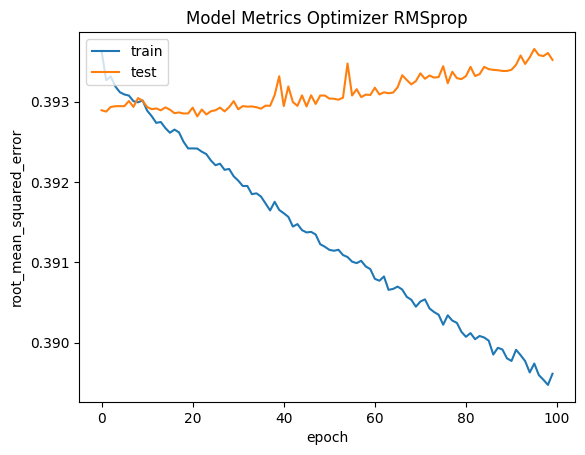

In [82]:
plt.plot(history_rms.history['root_mean_squared_error'])
plt.plot(history_rms.history['val_root_mean_squared_error'])
plt.title('Model Metrics Optimizer RMSprop')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

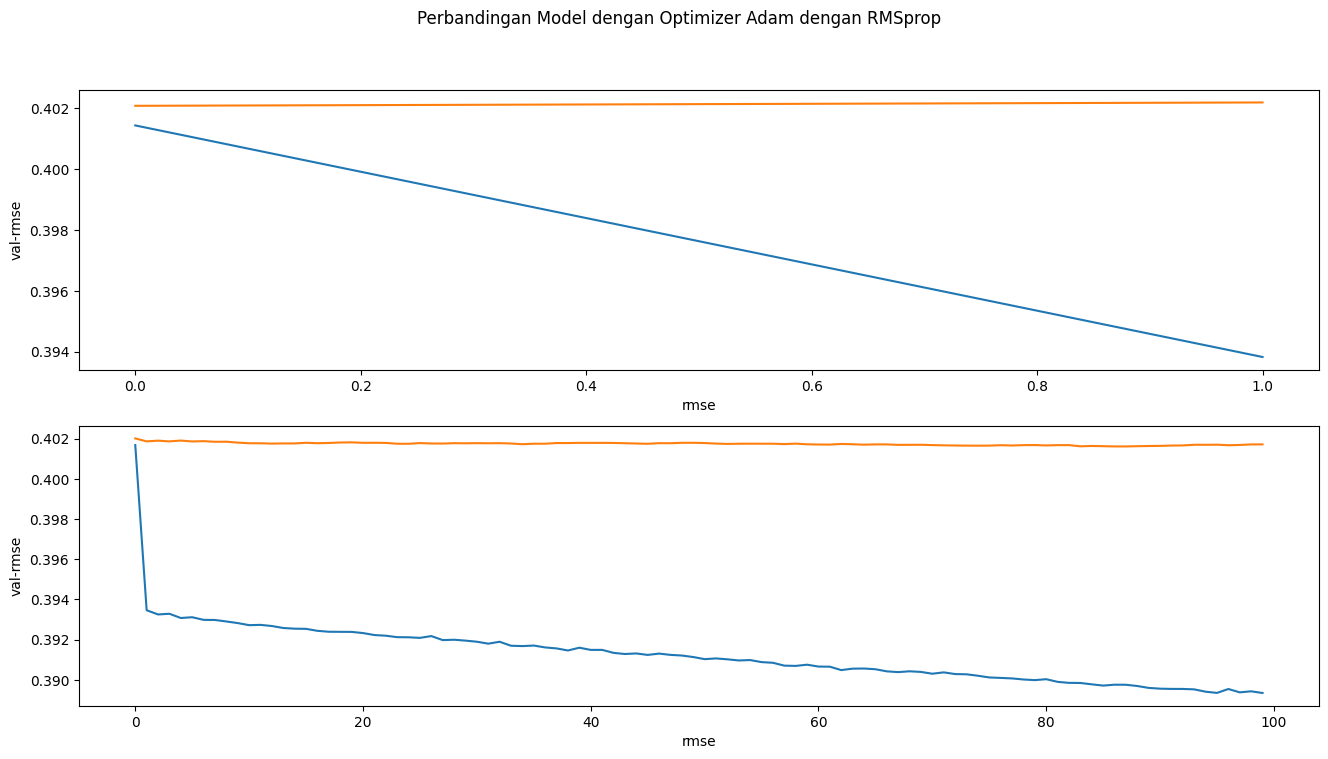

In [ ]:
fig, ax = plt.subplots(2, figsize=(16, 8))

mt1 = history.history['root_mean_squared_error']
mv1 = history.history['val_root_mean_squared_error']
mt2 = history_rms.history['root_mean_squared_error']
mv2 = history_rms.history['val_root_mean_squared_error']

ax[0].plot(mt1)
ax[0].plot(mv1)

ax[1].plot(mt2)
ax[1].plot(mv2)

for plot in ax.flat:
    plot.set(xlabel='rmse', ylabel='val-rmse')

plt.suptitle("Perbandingan Model dengan Optimizer Adam dengan RMSprop")

plt.show()

In [ ]:
# Mengambil sample user
user_id = blog_all.userId.sample(1).iloc[0]
blog_read_by_user = blog_all[blog_all.userId == user_id]

# Operator bitwise
blog_not_read = blog_all[~blog_all['blog_id'].isin(blog_read_by_user.blog_id.values)]['blog_id']
blog_not_read = list(
    set(blog_not_read)
    .intersection(set(blog_to_blog_encoded.keys()))
)

blog_not_read = [[blog_to_blog_encoded.get(x)] for x in blog_not_read]
user_encoder = user_to_user_encoded.get(user_id)
user_blog_array = np.hstack(
    ([[user_encoder]] * len(blog_not_read), blog_not_read)
)

In [ ]:
ratings = model.predict(user_blog_array).flatten()

# top rating
top_ratings_indices = ratings.argsort()[-10:][::-1]

# rekomendasi blog
recommended_blog_ids = [
    blog_encoded_to_blog.get(blog_not_read[x][0]) for x in top_ratings_indices
]

print('Menampilkan rekomendasi untuk user: {}'.format(user_id))
print('==' * 20)
print('blog dengan peringkat tinggi dari user')
print('--' * 20)

# mencari rekomendasi blog berdasarkan rating yang diberikan user
top_blog_user = (
    blog_read_by_user.sort_values(
        by = 'ratings',
        ascending=False
    )
    .head(5)
    .blog_id.values
)

df_blog_rows = blog_df[blog_df['blog_id'].isin(top_blog_user)]
for idx, row in enumerate(df_blog_rows.itertuples(index=False), start=1):
    print("{}. Title Blog:".format(idx), row[1])
    print("   Topic:", row[3])
    print()

print('--' * 20)
print('10 rekomendasi blog teratas')
print('--' * 20)

# rekomendasi blog
blog_top10 = blog_df[blog_df['blog_id'].isin(recommended_blog_ids)]

# fungsi perulangan untuk menampilkan rekomendasi blog dan topic sebanyak 10 buah
for idx, row in enumerate(blog_top10.itertuples(index=False), start=1):
    print("{}. Title Blog:".format(idx), row[1])
    print("   Topic:", row[3])
    print()


300/300 [==============================] - 1s 3ms/step
Menampilkan rekomendasi untuk user: 2405
blog dengan peringkat tinggi dari user
----------------------------------------
1. Title Blog: Excel Data Analysis
   Topic: data-analysis

2. Title Blog: Gate 2023 | front-end, back-end of compiler
   Topic: backend

3. Title Blog: API Validation on FE
   Topic: backend

4. Title Blog: Asynchronous JavaScript ve API Notlarım — 2
   Topic: backend

5. Title Blog: What’s wrong with PROC SORT: Custom Sort Order in SAS⬆️
   Topic: data-analysis

----------------------------------------
10 rekomendasi blog teratas
----------------------------------------
1. Title Blog: Let’s Dominate The Launchpad Space Again
   Topic: ai

2. Title Blog: Using ChatGPT for User Research
   Topic: ai

3. Title Blog: The Automated Stable-Diffusion Checkpoint Merger, autoMBW.
   Topic: ai

4. Title Blog: Mendeleev vs chatGPT and Microsoft Bing
   Topic: ai

5. Title Blog: Yes, ChatGPT Can Hurt Writers, But Not The W

# Model Evaluation